In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib

def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [89]:
plt.rcParams['text.latex.preamble']=r"\usepackage{mlmodern}"
plt.rcParams["text.usetex"] = True
plt.rcParams["font.size"] = 11
plt.rcParams["font.family"] = 'mlmodern'
#plt.rcParams["mathtext.fontset"] = "cm"

In [2]:
def ket(s):
    return r"$\left|{}\right\rangle$".format(s)

print(ket("01"))

$\left|01\right\rangle$


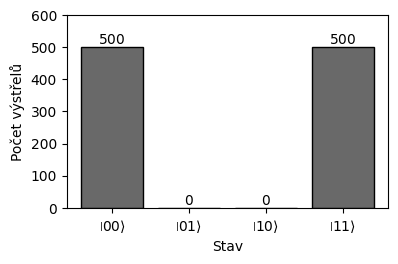

In [3]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+10, r"${}$".format(str(y[i])), ha = 'center')

plt.figure(figsize = (4.15,2.5))

x = np.array([ket("00"), ket("01"), ket("10"), ket("11")])
y = np.array([500, 0, 0, 500])

plt.bar(x,y, color = "dimgrey", edgecolor = "black")
addlabels(x, y)

plt.ylim(0, 600)

plt.ylabel("Počet výstřelů")
plt.xlabel("Stav")

plt.savefig('measurement_plot.pdf', bbox_inches = "tight")
plt.show()

In [52]:
data_raw = np.loadtxt("./data/test_aer_simulator_cobyla.csv", delimiter=",")
data = reject_outliers(data_raw.T[0])
#print(data)

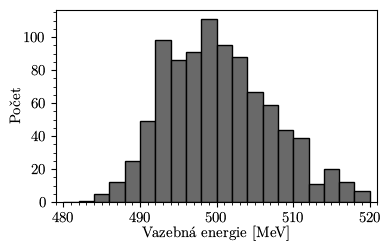

In [212]:
data_raw = np.loadtxt("./data/test_aer_simulator_cobyla.csv", delimiter=",")
#data_raw = np.loadtxt("./data/omega562_aer_simulator_cobyla.csv", delimiter=",")
#data = reject_outliers(data.T[0])
data = data_raw.T[0]

plt.figure(figsize = (4.15,2.5))

counts, bins = np.histogram(data, bins=20, range=(480,520))
plt.hist(bins[:-1], bins, weights=counts, color = "dimgrey", edgecolor = "black")

plt.xticks(np.arange(479,522,1), minor = True)
plt.yticks(np.arange(0,120,5), minor = True)

plt.xlim(479,521)

#plt.xlim(400, 600)

plt.ylabel("Počet", labelpad=.1)
plt.xlabel("Vazebná energie [MeV]", labelpad=.2)

plt.savefig('Aer_cobyla_1000.pdf', bbox_inches = "tight")
plt.show()

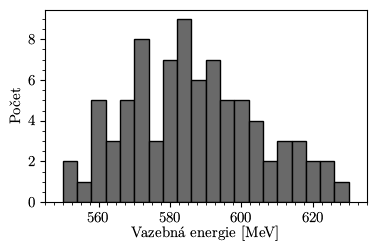

In [229]:
data_raw = np.loadtxt("./data/omega562_fake_sherbrooke_cobyla.csv", delimiter=",")
#data = reject_outliers(data.T[0])
data = data_raw.T[0] - 5

plt.figure(figsize = (4.15,2.5))

counts, bins = np.histogram(data, bins=20, range=(550,630) )

plt.xticks(np.arange(545,640,2.5), minor = True)
plt.yticks(np.arange(0,10,.5), minor = True)

plt.xlim(545,635)

plt.hist(bins[:-1], bins, weights=counts, color = "dimgrey", edgecolor = "black")

#plt.xlim(400, 600)

plt.ylabel("Počet", labelpad=3)
plt.xlabel("Vazebná energie [MeV]", labelpad=.2)

plt.savefig('Sherbrooke_cobyla_100.pdf', bbox_inches = "tight")
plt.show()

In [202]:
m=0.5

print( np.mean(reject_outliers(data_raw.T[0], m)) )
print( np.std(reject_outliers(data_raw.T[0], m)) )
print( np.sqrt(np.sum(data_raw.T[1]**2))/100 )

598.2217533507827
26.353287347756964
2.006119048842524


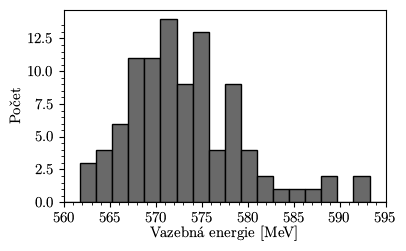

In [258]:
data_raw = np.loadtxt("./data/omega562_fake_sherbrooke_cobyla_10k shots.csv", delimiter=",")
#data = reject_outliers(data.T[0])
data = data_raw.T[0] - 5

plt.figure(figsize = (4.15,2.5))

counts, bins = np.histogram(data, bins=20, range=(560,595) )

plt.xticks(np.arange(560,600,1), minor = True)
plt.yticks(np.arange(0,14,.5), minor = True)

#plt.xlim(545,635)

plt.hist(bins[:-1], bins, weights=counts, color = "dimgrey", edgecolor = "black")

plt.xlim(560, 595)

plt.ylabel("Počet", labelpad=3)
plt.xlabel("Vazebná energie [MeV]", labelpad=.2)

plt.savefig('Sherbrooke_cobyla_100.pdf', bbox_inches = "tight")
plt.show()

In [239]:
m=0.5

print( np.mean(reject_outliers(data_raw.T[0], m)) )
print( np.std(reject_outliers(data_raw.T[0], m)) )
print( np.sqrt(np.sum(data_raw.T[1]**2))/100 )

578.3951888965807
6.592521377109258
0.5631865400546625


In [230]:
data_raw = np.loadtxt("./data/conv_plot_run_1_Nelder-Mead.csv", delimiter=",")
#data = reject_outliers(data_raw.T[0])
#print(data)

In [231]:
minimum = min(data_raw.T[0])
err = data_raw.T[1][np.where(data_raw.T[0] == minimum)][0]
print("{} +- {}".format(minimum,err))

552.6250504318151 +- 8.583499460143287


In [232]:
energy = data_raw.T[0]
iters = np.arange(len(energy))

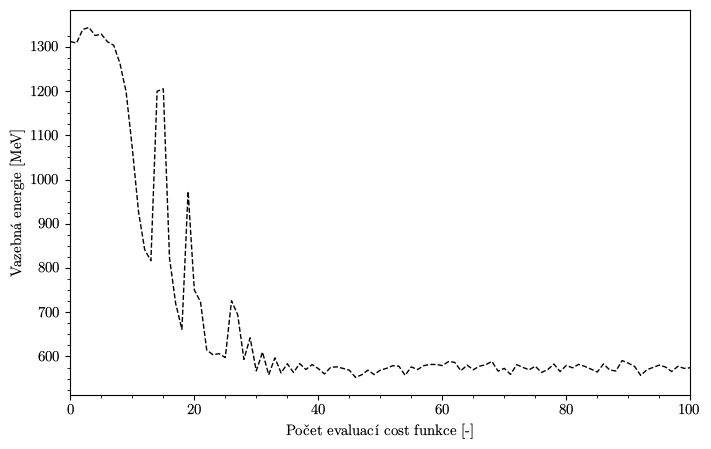

In [233]:
plt.figure(figsize = (8,5))

plt.plot(iters[::],energy[::],color = 'k',marker = '', linestyle = "dashed", linewidth = 1)
#plt.plot(x_range,func(x_range,I0,shift,K), color = 'k', linestyle = 'dashed', label = r"Proložení křivkou: $I = I_0 \cdot (\cos(\varphi + \Theta))^2 + K$")

#plt.legend(loc='upper left', fontsize=10)

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)

plt.yticks(np.arange(525,1350,25), minor = True)
#plt.xticks(np.arange(0,46,5))
plt.xticks(np.arange(0,110,5), minor=True)

plt.xlim(0,100)

plt.ylabel("Vazebná energie " + "[MeV]")
plt.xlabel("Počet evaluací cost funkce [-]")

plt.savefig('convergence.pdf', bbox_inches = 'tight')
plt.show()

In [234]:
data_raw = np.loadtxt("./data/conv_plot_cobyla_run_1_cobyla.csv", delimiter=",")
#data = reject_outliers(data_raw.T[0])
#print(data)

In [235]:
minimum = min(data_raw.T[0])
err = data_raw.T[1][np.where(data_raw.T[0] == minimum)][0]
print("{} +- {}".format(minimum,err))

562.6297999302496 +- 5.352725227742764


In [236]:
energy = data_raw.T[0]
iters = np.arange(len(energy))

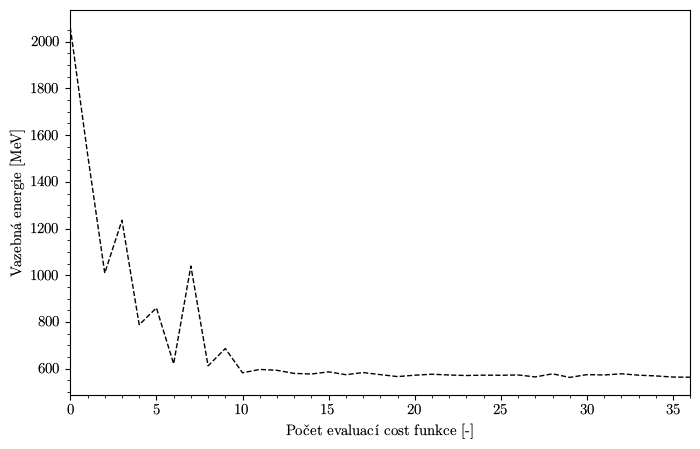

In [237]:
plt.figure(figsize = (8,5))

plt.plot(iters[::],energy[::],color = 'k',marker = '', linestyle = "dashed", linewidth = 1)
#plt.plot(x_range,func(x_range,I0,shift,K), color = 'k', linestyle = 'dashed', label = r"Proložení křivkou: $I = I_0 \cdot (\cos(\varphi + \Theta))^2 + K$")

#plt.legend(loc='upper left', fontsize=10)

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [1,0]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', fontsize=11)

plt.yticks(np.arange(500,2100,50), minor = True)
#plt.xticks(np.arange(0,46,5))
plt.xticks(np.arange(0,37,1), minor=True)

plt.xlim(0,36)

plt.ylabel("Vazebná energie " + "[MeV]")
plt.xlabel("Počet evaluací cost funkce [-]")

plt.savefig('convergence2.pdf', bbox_inches = 'tight')
plt.show()